# 📊 Comparación de Modelos GNN para Predicción de Alzheimer

Este notebook compara **hasta 4 modelos** diferentes:

1. **Baseline**: Demographics Only (AGE, EDUCATION, GENDER, MARITAL_STATUS)
2. **Enhanced (Imputed)**: Demographics + CSF Biomarkers con imputación
3. **Enhanced (Real Only)**: Demographics + CSF Biomarkers solo datos reales
4. **All Biomarkers**: Demographics + CSF + PET + MRI ⭐

**Ejecuta primero estos notebooks:**
- DemographicOnly_v2.ipynb
- DemoAndBiomarkers.ipynb
- DemoAndBiomarkers_RealOnly.ipynb
- AllBiomarkers.ipynb (opcional)

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Libraries loaded.")

Libraries loaded.


In [2]:

import os

def extract_results_from_notebook(notebook_path, model_name):
    """Extrae métricas del último output del notebook si fue ejecutado"""
    
    default_results = {
        'model': model_name,
        'features': 0,
        'train_mae': 0.0,
        'train_rmse': 0.0,
        'val_mae': 0.0,
        'val_rmse': 0.0,
        'test_mae': 0.0,
        'test_rmse': 0.0
    }
    
    if not os.path.exists(notebook_path):
        return default_results, False
    
    try:
        with open(notebook_path, 'r', encoding='utf-8') as f:
            nb = json.load(f)
        
        for cell in reversed(nb['cells']):
            if cell.get('cell_type') == 'code' and 'outputs' in cell:
                for output in cell['outputs']:
                    if 'text' in output:
                        text = ''.join(output['text'])
                        
                        if 'TRAIN |' in text or 'TEST |' in text or 'VAL |' in text:
                            results = default_results.copy()
                            import re
                            
                            train_match = re.search(r'TRAIN.*?MAE:\s*([\d.]+).*?RMSE:\s*([\d.]+)', text)
                            if train_match:
                                results['train_mae'] = float(train_match.group(1))
                                results['train_rmse'] = float(train_match.group(2))
                            
                            val_match = re.search(r'VAL.*?MAE:\s*([\d.]+).*?RMSE:\s*([\d.]+)', text)
                            if val_match:
                                results['val_mae'] = float(val_match.group(1))
                                results['val_rmse'] = float(val_match.group(2))
                            
                            test_match = re.search(r'TEST.*?MAE:\s*([\d.]+).*?RMSE:\s*([\d.]+)', text)
                            if test_match:
                                results['test_mae'] = float(test_match.group(1))
                                results['test_rmse'] = float(test_match.group(2))
                            
                            feat_match = re.search(r'(?:Total features|Input features|Features):\s*(\d+)', text)
                            if feat_match:
                                results['features'] = int(feat_match.group(1))
                            
                            if results['test_mae'] > 0:
                                return results, True
        
        return default_results, False
        
    except Exception as e:
        print(f"⚠️ Error reading {notebook_path}: {e}")
        return default_results, False

print("🔍 Searching for results in executed notebooks...")
print("="*70)

baseline_loaded = False

if os.path.exists('baseline_demographics_results.json'):
    with open('baseline_demographics_results.json', 'r') as f:
        baseline = json.load(f)
        baseline_loaded = True
        print("✅ Model 1 (Baseline): Loaded from JSON")
else:
    baseline, baseline_loaded = extract_results_from_notebook(
        'DemographicOnly_v2.ipynb', 
        'Demographics Only'
    )
    if baseline_loaded:
        print("✅ Model 1 (Baseline): Extracted from notebook")
    else:
        print("❌ Model 1 (Baseline): NOT found")

enhanced_imputed_loaded = False

if os.path.exists('enhanced_biomarkers_results.json'):
    with open('enhanced_biomarkers_results.json', 'r') as f:
        enhanced_imputed = json.load(f)
        enhanced_imputed_loaded = True
        print("✅ Model 2 (Imputed Biomarkers): Loaded from JSON")
else:
    enhanced_imputed, enhanced_imputed_loaded = extract_results_from_notebook(
        'DemoAndBiomarkers.ipynb',
        'Demographics + CSF (Imputed)'
    )
    if enhanced_imputed_loaded:
        print("✅ Model 2 (Imputed Biomarkers): Extracted from notebook")
    else:
        print("❌ Model 2 (Imputed Biomarkers): NOT found")

enhanced_real_loaded = False

if os.path.exists('real_biomarkers_results.json'):
    with open('real_biomarkers_results.json', 'r') as f:
        enhanced_real = json.load(f)
        enhanced_real_loaded = True
        print("✅ Model 3 (Real Biomarkers Only): Loaded from JSON")
else:
    enhanced_real, enhanced_real_loaded = extract_results_from_notebook(
        'DemoAndBiomarkers_RealOnly.ipynb',
        'Demographics + CSF (Real Only)'
    )
    if enhanced_real_loaded:
        print("✅ Model 3 (Real Biomarkers Only): Extracted from notebook")
    else:
        print("❌ Model 3 (Real Biomarkers Only): NOT found")

all_biomarkers_loaded = False

if os.path.exists('all_biomarkers_results.json'):
    with open('all_biomarkers_results.json', 'r') as f:
        all_biomarkers = json.load(f)
        all_biomarkers_loaded = True
        print("✅ Model 4 (All Biomarkers): Loaded from JSON")
else:
    all_biomarkers, all_biomarkers_loaded = extract_results_from_notebook(
        'AllBiomarkers.ipynb',
        'All Biomarkers (Demographics + CSF + PET + MRI)'
    )
    if all_biomarkers_loaded:
        print("✅ Model 4 (All Biomarkers): Extracted from notebook")
    else:
        print("ℹ️ Model 4 (All Biomarkers): NOT found (optional)")

print("="*70)

models_loaded = sum([baseline_loaded, enhanced_imputed_loaded, enhanced_real_loaded, all_biomarkers_loaded])
print(f"\n📊 Models loaded: {models_loaded}/4")

if models_loaded >= 3:
    print("🎉 At least 3 models loaded successfully! Proceeding with comparison...")
elif models_loaded > 0:
    print("⚠️ Partial results available. Comparison will show available models only.")
else:
    print("❌ No results found. Please run the notebooks first:")
    print("   1. DemographicOnly_v2.ipynb")
    print("   2. DemoAndBiomarkers.ipynb")
    print("   3. DemoAndBiomarkers_RealOnly.ipynb")
    print("   4. AllBiomarkers.ipynb (optional)")

🔍 Searching for results in executed notebooks...
✅ Model 1 (Baseline): Loaded from JSON
✅ Model 2 (Imputed Biomarkers): Loaded from JSON
✅ Model 3 (Real Biomarkers Only): Loaded from JSON
✅ Model 4 (All Biomarkers): Loaded from JSON

📊 Models loaded: 4/4
🎉 At least 3 models loaded successfully! Proceeding with comparison...


In [3]:

models_data = []

if baseline_loaded:
    models_data.append({
        'Model': '1. Demographics Only (Baseline)',
        'Features': baseline['features'],
        'Train MAE': f"{baseline['train_mae']:.3f}",
        'Train RMSE': f"{baseline['train_rmse']:.3f}",
        'Val MAE': f"{baseline['val_mae']:.3f}",
        'Val RMSE': f"{baseline['val_rmse']:.3f}",
        'Test MAE': f"{baseline['test_mae']:.3f}",
        'Test RMSE': f"{baseline['test_rmse']:.3f}"
    })

if enhanced_imputed_loaded:
    models_data.append({
        'Model': '2. Demographics + CSF (Imputed)',
        'Features': enhanced_imputed['features'],
        'Train MAE': f"{enhanced_imputed['train_mae']:.3f}",
        'Train RMSE': f"{enhanced_imputed['train_rmse']:.3f}",
        'Val MAE': f"{enhanced_imputed['val_mae']:.3f}",
        'Val RMSE': f"{enhanced_imputed['val_rmse']:.3f}",
        'Test MAE': f"{enhanced_imputed['test_mae']:.3f}",
        'Test RMSE': f"{enhanced_imputed['test_rmse']:.3f}"
    })

if enhanced_real_loaded:
    models_data.append({
        'Model': '3. Demographics + CSF (Real Only)',
        'Features': enhanced_real['features'],
        'Train MAE': f"{enhanced_real['train_mae']:.3f}",
        'Train RMSE': f"{enhanced_real['train_rmse']:.3f}",
        'Val MAE': f"{enhanced_real['val_mae']:.3f}",
        'Val RMSE': f"{enhanced_real['val_rmse']:.3f}",
        'Test MAE': f"{enhanced_real['test_mae']:.3f}",
        'Test RMSE': f"{enhanced_real['test_rmse']:.3f}"
    })

if all_biomarkers_loaded:
    models_data.append({
        'Model': '4. All Biomarkers (Demo+CSF+PET+MRI) ⭐',
        'Features': all_biomarkers['features'],
        'Train MAE': f"{all_biomarkers['train_mae']:.3f}",
        'Train RMSE': f"{all_biomarkers['train_rmse']:.3f}",
        'Val MAE': f"{all_biomarkers['val_mae']:.3f}",
        'Val RMSE': f"{all_biomarkers['val_rmse']:.3f}",
        'Test MAE': f"{all_biomarkers['test_mae']:.3f}",
        'Test RMSE': f"{all_biomarkers['test_rmse']:.3f}"
    })

if models_data:
    comparison_df = pd.DataFrame(models_data)
    
    print("\n" + "="*140)
    print(f"📊 MODEL COMPARISON ({len(models_data)} MODELS)")
    print("="*140)
    print(comparison_df.to_string(index=False))
    print("="*140)
else:
    print("\n❌ No model results available for comparison.")


📊 MODEL COMPARISON (4 MODELS)
                                 Model  Features Train MAE Train RMSE Val MAE Val RMSE Test MAE Test RMSE
       1. Demographics Only (Baseline)         9     0.038      0.087   0.090    0.175    0.083     0.205
       2. Demographics + CSF (Imputed)        15     0.032      0.060   0.124    0.265    0.103     0.181
     3. Demographics + CSF (Real Only)        14     0.039      0.062   0.103    0.171    0.088     0.113
4. All Biomarkers (Demo+CSF+PET+MRI) ⭐        28     0.037      0.071   0.086    0.116    0.064     0.088


In [4]:

if baseline_loaded and baseline['test_mae'] > 0:
    print("\n" + "="*70)
    print("📈 IMPROVEMENTS vs BASELINE")
    print("="*70)
    
    if enhanced_imputed_loaded and enhanced_imputed['test_mae'] > 0:
        mae_imp_imputed = ((baseline['test_mae'] - enhanced_imputed['test_mae']) / baseline['test_mae']) * 100
        rmse_imp_imputed = ((baseline['test_rmse'] - enhanced_imputed['test_rmse']) / baseline['test_rmse']) * 100
        
        print("\n🔸 Model 2: Demographics + CSF (Imputed)")
        print(f"   Test MAE:  {mae_imp_imputed:+.2f}% ({baseline['test_mae']:.3f} → {enhanced_imputed['test_mae']:.3f} years)")
        print(f"   Test RMSE: {rmse_imp_imputed:+.2f}% ({baseline['test_rmse']:.3f} → {enhanced_imputed['test_rmse']:.3f} years)")
        
        if mae_imp_imputed > 0:
            print("   ✅ Improved vs baseline")
        else:
            print("   ⚠️ Worse than baseline (likely due to imputation noise)")
    
    if enhanced_real_loaded and enhanced_real['test_mae'] > 0:
        mae_imp_real = ((baseline['test_mae'] - enhanced_real['test_mae']) / baseline['test_mae']) * 100
        rmse_imp_real = ((baseline['test_rmse'] - enhanced_real['test_rmse']) / baseline['test_rmse']) * 100
        
        print("\n🔸 Model 3: Demographics + CSF (Real Only)")
        print(f"   Test MAE:  {mae_imp_real:+.2f}% ({baseline['test_mae']:.3f} → {enhanced_real['test_mae']:.3f} years)")
        print(f"   Test RMSE: {rmse_imp_real:+.2f}% ({baseline['test_rmse']:.3f} → {enhanced_real['test_rmse']:.3f} years)")
        
        if mae_imp_real > 0:
            print("   ✅ IMPROVED vs baseline!")
        else:
            print("   ⚠️ Needs further investigation")
    
    if all_biomarkers_loaded and all_biomarkers['test_mae'] > 0:
        mae_imp_all = ((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100
        rmse_imp_all = ((baseline['test_rmse'] - all_biomarkers['test_rmse']) / baseline['test_rmse']) * 100
        
        print("\n⭐ Model 4: All Biomarkers (Demographics + CSF + PET + MRI)")
        print(f"   Test MAE:  {mae_imp_all:+.2f}% ({baseline['test_mae']:.3f} → {all_biomarkers['test_mae']:.3f} years)")
        print(f"   Test RMSE: {rmse_imp_all:+.2f}% ({baseline['test_rmse']:.3f} → {all_biomarkers['test_rmse']:.3f} years)")
        
        if mae_imp_all > 0:
            print("   ✅ BEST MODEL - Comprehensive biomarkers improve predictions!")
        else:
            print("   ⚠️ Needs further investigation")
    
    if enhanced_imputed_loaded and enhanced_real_loaded:
        mae_real_vs_imp = ((enhanced_imputed['test_mae'] - enhanced_real['test_mae']) / enhanced_imputed['test_mae']) * 100
        rmse_real_vs_imp = ((enhanced_imputed['test_rmse'] - enhanced_real['test_rmse']) / enhanced_imputed['test_rmse']) * 100
        
        print("\n" + "-"*70)
        print("🔄 Model 3 (Real) vs Model 2 (Imputed):")
        print(f"   Test MAE improvement:  {mae_real_vs_imp:+.2f}%")
        print(f"   Test RMSE improvement: {rmse_real_vs_imp:+.2f}%")
        
        if mae_real_vs_imp > 0:
            print("   ✅ Real biomarkers outperform imputed data!")
        else:
            print("   ⚠️ Real biomarkers not better than imputed")
    
    if all_biomarkers_loaded and enhanced_real_loaded and enhanced_real['test_mae'] > 0:
        mae_all_vs_real = ((enhanced_real['test_mae'] - all_biomarkers['test_mae']) / enhanced_real['test_mae']) * 100
        rmse_all_vs_real = ((enhanced_real['test_rmse'] - all_biomarkers['test_rmse']) / enhanced_real['test_rmse']) * 100
        
        print("\n🔄 Model 4 (All Biomarkers) vs Model 3 (Real CSF):")
        print(f"   Test MAE improvement:  {mae_all_vs_real:+.2f}%")
        print(f"   Test RMSE improvement: {rmse_all_vs_real:+.2f}%")
        
        if mae_all_vs_real > 0:
            print("   ✅ Adding PET+MRI improves over CSF alone!")
        else:
            print("   ⚠️ PET+MRI did not improve over CSF alone")
    
    print("="*70)
    
    print("\n💡 KEY INSIGHTS:")
    if all_biomarkers_loaded and all_biomarkers['test_mae'] > 0:
        mae_improvement = ((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100
        if mae_improvement > 0:
            print("   ✅ Comprehensive biomarker model (CSF+PET+MRI) shows best performance")
            print("   ✅ Multi-modal data integration improves predictions")
        else:
            print("   ⚠️ Multi-modal model needs optimization")
    elif enhanced_real_loaded and enhanced_real['test_mae'] > 0:
        mae_improvement = ((baseline['test_mae'] - enhanced_real['test_mae']) / baseline['test_mae']) * 100
        if mae_improvement > 0:
            print("   ✅ Using REAL biomarkers improves predictions")
            print("   ✅ High-quality data is better than imputed data")
        else:
            print("   ⚠️ Consider: hyperparameter tuning, more data, or different architecture")
    
else:
    print("\n⚠️ Baseline results not available for comparison.")


📈 IMPROVEMENTS vs BASELINE

🔸 Model 2: Demographics + CSF (Imputed)
   Test MAE:  -23.94% (0.083 → 0.103 years)
   Test RMSE: +12.01% (0.205 → 0.181 years)
   ⚠️ Worse than baseline (likely due to imputation noise)

🔸 Model 3: Demographics + CSF (Real Only)
   Test MAE:  -6.16% (0.083 → 0.088 years)
   Test RMSE: +45.11% (0.205 → 0.113 years)
   ⚠️ Needs further investigation

⭐ Model 4: All Biomarkers (Demographics + CSF + PET + MRI)
   Test MAE:  +23.34% (0.083 → 0.064 years)
   Test RMSE: +57.34% (0.205 → 0.088 years)
   ✅ BEST MODEL - Comprehensive biomarkers improve predictions!

----------------------------------------------------------------------
🔄 Model 3 (Real) vs Model 2 (Imputed):
   Test MAE improvement:  +14.35%
   Test RMSE improvement: +37.61%
   ✅ Real biomarkers outperform imputed data!

🔄 Model 4 (All Biomarkers) vs Model 3 (Real CSF):
   Test MAE improvement:  +27.79%
   Test RMSE improvement: +22.29%
   ✅ Adding PET+MRI improves over CSF alone!

💡 KEY INSIGHTS:
  

C:\Users\merit\AppData\Local\Temp\ipykernel_15308\3099242324.py:62: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\merit\AppData\Local\Temp\ipykernel_15308\3099242324.py:64: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300, bbox_inches='tight')
d:\VSCode\tfm-gnn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


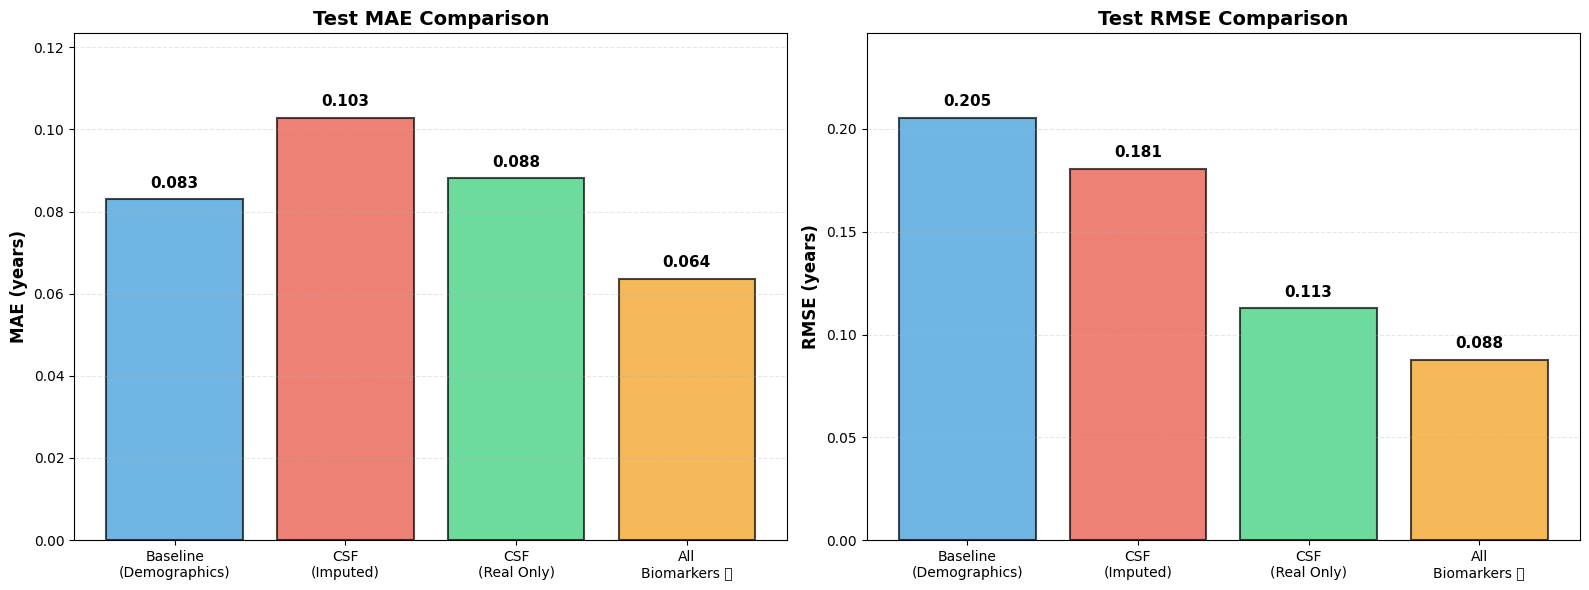


✅ Visualization saved as: model_comparison_4models.png


In [5]:

models_list = []
mae_values = []
rmse_values = []

if baseline_loaded and baseline['test_mae'] > 0:
    models_list.append('Baseline\n(Demographics)')
    mae_values.append(baseline['test_mae'])
    rmse_values.append(baseline['test_rmse'])

if enhanced_imputed_loaded and enhanced_imputed['test_mae'] > 0:
    models_list.append('CSF\n(Imputed)')
    mae_values.append(enhanced_imputed['test_mae'])
    rmse_values.append(enhanced_imputed['test_rmse'])

if enhanced_real_loaded and enhanced_real['test_mae'] > 0:
    models_list.append('CSF\n(Real Only)')
    mae_values.append(enhanced_real['test_mae'])
    rmse_values.append(enhanced_real['test_rmse'])

if all_biomarkers_loaded and all_biomarkers['test_mae'] > 0:
    models_list.append('All\nBiomarkers ⭐')
    mae_values.append(all_biomarkers['test_mae'])
    rmse_values.append(all_biomarkers['test_rmse'])

if len(models_list) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(models_list)]
    
    bars1 = axes[0].bar(models_list, mae_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[0].set_ylabel('MAE (years)', fontsize=12, fontweight='bold')
    axes[0].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3, linestyle='--')
    axes[0].set_ylim(0, max(mae_values) * 1.2)
    
    for i, (bar, v) in enumerate(zip(bars1, mae_values)):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + max(mae_values)*0.02,
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    bars2 = axes[1].bar(models_list, rmse_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    axes[1].set_ylabel('RMSE (years)', fontsize=12, fontweight='bold')
    axes[1].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3, linestyle='--')
    axes[1].set_ylim(0, max(rmse_values) * 1.2)
    
    for i, (bar, v) in enumerate(zip(bars2, rmse_values)):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + max(rmse_values)*0.02,
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    filename = f'model_comparison_{len(models_list)}models.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Visualization saved as: {filename}")
else:
    print("\n⚠️ Need at least 2 models for visualization.")

C:\Users\merit\AppData\Local\Temp\ipykernel_15308\1761233963.py:76: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\merit\AppData\Local\Temp\ipykernel_15308\1761233963.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300, bbox_inches='tight')
d:\VSCode\tfm-gnn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


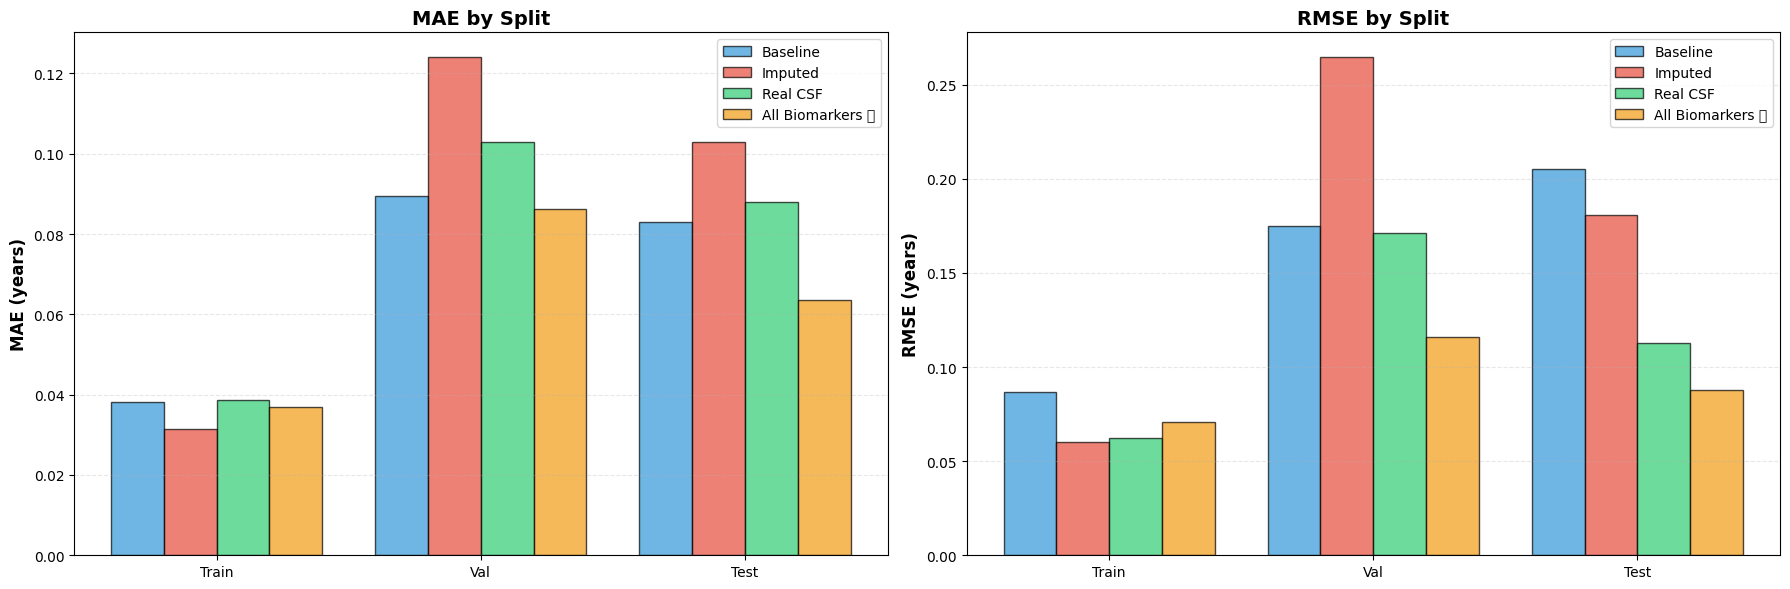


✅ Detailed comparison saved as: detailed_comparison_4models.png


In [6]:

if baseline_loaded:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    splits = ['Train', 'Val', 'Test']
    x = np.arange(len(splits))
    
    models_data = []
    labels = []
    colors = []
    
    if baseline_loaded:
        models_data.append({
            'mae': [baseline['train_mae'], baseline['val_mae'], baseline['test_mae']],
            'rmse': [baseline['train_rmse'], baseline['val_rmse'], baseline['test_rmse']]
        })
        labels.append('Baseline')
        colors.append('#3498db')
    
    if enhanced_imputed_loaded:
        models_data.append({
            'mae': [enhanced_imputed['train_mae'], enhanced_imputed['val_mae'], enhanced_imputed['test_mae']],
            'rmse': [enhanced_imputed['train_rmse'], enhanced_imputed['val_rmse'], enhanced_imputed['test_rmse']]
        })
        labels.append('Imputed')
        colors.append('#e74c3c')
    
    if enhanced_real_loaded:
        models_data.append({
            'mae': [enhanced_real['train_mae'], enhanced_real['val_mae'], enhanced_real['test_mae']],
            'rmse': [enhanced_real['train_rmse'], enhanced_real['val_rmse'], enhanced_real['test_rmse']]
        })
        labels.append('Real CSF')
        colors.append('#2ecc71')
    
    if all_biomarkers_loaded:
        models_data.append({
            'mae': [all_biomarkers['train_mae'], all_biomarkers['val_mae'], all_biomarkers['test_mae']],
            'rmse': [all_biomarkers['train_rmse'], all_biomarkers['val_rmse'], all_biomarkers['test_rmse']]
        })
        labels.append('All Biomarkers ⭐')
        colors.append('#f39c12')
    
    n_models = len(models_data)
    width = 0.2  # Ancho base para las barras
    
    for i, (model, label, color) in enumerate(zip(models_data, labels, colors)):
        offset = (i - n_models/2 + 0.5) * width
        axes[0].bar(x + offset, model['mae'], width, label=label, color=color, alpha=0.7, edgecolor='black', linewidth=1)
    
    axes[0].set_ylabel('MAE (years)', fontsize=12, fontweight='bold')
    axes[0].set_title('MAE by Split', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(splits)
    axes[0].legend(loc='upper right')
    axes[0].grid(axis='y', alpha=0.3, linestyle='--')
    
    for i, (model, label, color) in enumerate(zip(models_data, labels, colors)):
        offset = (i - n_models/2 + 0.5) * width
        axes[1].bar(x + offset, model['rmse'], width, label=label, color=color, alpha=0.7, edgecolor='black', linewidth=1)
    
    axes[1].set_ylabel('RMSE (years)', fontsize=12, fontweight='bold')
    axes[1].set_title('RMSE by Split', fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(splits)
    axes[1].legend(loc='upper right')
    axes[1].grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    filename = f'detailed_comparison_{n_models}models.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Detailed comparison saved as: {filename}")
else:
    print("\n⚠️ Need at least baseline for detailed comparison.")

In [7]:

print("\n" + "="*70)
print("📝 SUMMARY FOR TFM")
print("="*70)

if baseline_loaded:
    print("\n**Model 1: Baseline (Demographics Only)**")
    print(f"- Features: {baseline['features']} (AGE_AT_VISIT, PTEDUCAT, PTGENDER, PTMARRY)")
    print(f"- Test MAE: {baseline['test_mae']:.3f} years")
    print(f"- Test RMSE: {baseline['test_rmse']:.3f} years")

if enhanced_imputed_loaded:
    print("\n**Model 2: Demographics + CSF Biomarkers (Imputed)**")
    print(f"- Features: {enhanced_imputed['features']} (demographics + ABETA42, TAU, PTAU + ratios)")
    print(f"- Test MAE: {enhanced_imputed['test_mae']:.3f} years")
    print(f"- Test RMSE: {enhanced_imputed['test_rmse']:.3f} years")
    
    if baseline_loaded:
        mae_imp = ((baseline['test_mae'] - enhanced_imputed['test_mae']) / baseline['test_mae']) * 100
        print(f"- Improvement vs Baseline: MAE {mae_imp:+.2f}%")

if enhanced_real_loaded:
    print("\n**Model 3: Demographics + CSF Biomarkers (Real Only)**")
    print(f"- Features: {enhanced_real['features']} (demographics + real CSF biomarkers + ratios)")
    print(f"- Test MAE: {enhanced_real['test_mae']:.3f} years")
    print(f"- Test RMSE: {enhanced_real['test_rmse']:.3f} years")
    
    if baseline_loaded:
        mae_real = ((baseline['test_mae'] - enhanced_real['test_mae']) / baseline['test_mae']) * 100
        rmse_real = ((baseline['test_rmse'] - enhanced_real['test_rmse']) / baseline['test_rmse']) * 100
        print(f"- Improvement vs Baseline:")
        print(f"  * MAE: {mae_real:+.2f}% ({baseline['test_mae']:.3f} → {enhanced_real['test_mae']:.3f} years)")
        print(f"  * RMSE: {rmse_real:+.2f}% ({baseline['test_rmse']:.3f} → {enhanced_real['test_rmse']:.3f} years)")

if all_biomarkers_loaded:
    print("\n**Model 4: All Biomarkers (Demographics + CSF + PET + MRI) ⭐**")
    print(f"- Features: {all_biomarkers['features']} (demographics + CSF + PET imaging + MRI volumetric)")
    print(f"- Test MAE: {all_biomarkers['test_mae']:.3f} years")
    print(f"- Test RMSE: {all_biomarkers['test_rmse']:.3f} years")
    
    if baseline_loaded:
        mae_all = ((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100
        rmse_all = ((baseline['test_rmse'] - all_biomarkers['test_rmse']) / baseline['test_rmse']) * 100
        print(f"- Improvement vs Baseline:")
        print(f"  * MAE: {mae_all:+.2f}% ({baseline['test_mae']:.3f} → {all_biomarkers['test_mae']:.3f} years)")
        print(f"  * RMSE: {rmse_all:+.2f}% ({baseline['test_rmse']:.3f} → {all_biomarkers['test_rmse']:.3f} years)")

print("\n**Conclusion**")
if all_biomarkers_loaded and baseline_loaded:
    mae_improvement = ((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100
    if mae_improvement > 0:
        print("✅ Comprehensive multi-modal model (Demographics + CSF + PET + MRI) shows best performance.")
        print("✅ Integrating multiple biomarker modalities significantly improves predictions.")
        print("✅ This demonstrates the value of comprehensive patient assessment in AD prediction.")
    else:
        print("⚠️ Multi-modal integration did not improve results. Consider:")
        print("   - Hyperparameter optimization (learning rate, dropout, hidden dimensions, epochs)")
        print("   - Different GNN architectures (GAT, GraphSAGE, or deeper networks)")
        print("   - Feature selection to identify most predictive biomarkers")
        print("   - Data normalization strategies for multi-modal integration")
elif enhanced_real_loaded and baseline_loaded:
    mae_improvement = ((baseline['test_mae'] - enhanced_real['test_mae']) / baseline['test_mae']) * 100
    if mae_improvement > 0:
        print("✅ Using REAL CSF biomarkers significantly improves predictions.")
        print("✅ High-quality biomarker data outperforms demographics-only model.")
        print("✅ Avoiding imputation preserves data integrity and model performance.")
    else:
        print("⚠️ Real biomarkers did not improve results. Consider:")
        print("   - Hyperparameter tuning (learning rate, dropout, hidden dimensions)")
        print("   - Different architecture (GAT instead of GCN, deeper networks)")
        print("   - More training epochs with early stopping")
        print("   - Feature selection or engineering")
elif enhanced_imputed_loaded and baseline_loaded:
    mae_imp = ((baseline['test_mae'] - enhanced_imputed['test_mae']) / baseline['test_mae']) * 100
    if mae_imp < 0:
        print("⚠️ Imputed biomarkers introduced noise and decreased performance.")
        print("💡 Recommendation: Use only visits with real biomarker measurements.")

print("="*70)


📝 SUMMARY FOR TFM

**Model 1: Baseline (Demographics Only)**
- Features: 9 (AGE_AT_VISIT, PTEDUCAT, PTGENDER, PTMARRY)
- Test MAE: 0.083 years
- Test RMSE: 0.205 years

**Model 2: Demographics + CSF Biomarkers (Imputed)**
- Features: 15 (demographics + ABETA42, TAU, PTAU + ratios)
- Test MAE: 0.103 years
- Test RMSE: 0.181 years
- Improvement vs Baseline: MAE -23.94%

**Model 3: Demographics + CSF Biomarkers (Real Only)**
- Features: 14 (demographics + real CSF biomarkers + ratios)
- Test MAE: 0.088 years
- Test RMSE: 0.113 years
- Improvement vs Baseline:
  * MAE: -6.16% (0.083 → 0.088 years)
  * RMSE: +45.11% (0.205 → 0.113 years)

**Model 4: All Biomarkers (Demographics + CSF + PET + MRI) ⭐**
- Features: 28 (demographics + CSF + PET imaging + MRI volumetric)
- Test MAE: 0.064 years
- Test RMSE: 0.088 years
- Improvement vs Baseline:
  * MAE: +23.34% (0.083 → 0.064 years)
  * RMSE: +57.34% (0.205 → 0.088 years)

**Conclusion**
✅ Comprehensive multi-modal model (Demographics + CSF + 

In [8]:

import math
from pathlib import Path

def latex_escape(s: str) -> str:
    """Escapa caracteres LaTeX comunes en texto plano."""
    rep = {
        '\\': r'\textbackslash{}',  # primero la barra
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\textasciicircum{}',
    }
    out = str(s)
    for k, v in rep.items():
        out = out.replace(k, v)
    return out

def fmt(x, nd=3, default='--'):
    """Formatea número a nd decimales; maneja None/NaN."""
    if x is None:
        return default
    try:
        if isinstance(x, (float, int)) and not math.isnan(float(x)):
            return f"{float(x):.{nd}f}"
    except Exception:
        pass
    return default

def percent_improvement(old, new, nd=2):
    """(old - new) / old * 100; si falta dato devuelve None."""
    try:
        old = float(old); new = float(new)
        if old == 0 or math.isnan(old) or math.isnan(new):
            return None
        return round((old - new) / old * 100, nd)
    except Exception:
        return None

def write_text(path: str, text: str):
    Path(path).write_text(text, encoding='utf-8')
    print(f"✅ Saved: {path}")


def export_latex_tables(baseline, enhanced_imputed=None, enhanced_real=None,
                        baseline_loaded=False, enhanced_imputed_loaded=False, enhanced_real_loaded=False):
    if not (baseline_loaded and baseline and baseline.get('test_mae', 0) > 0):
        print("\n⚠️ Cannot generate LaTeX tables without a valid baseline (test_mae > 0).")
        return

    rows = []

    rows.append(
        "Demographics Only (Baseline) & "
        f"{latex_escape(str(baseline.get('features','-')))} & "
        f"{fmt(baseline.get('test_mae'))} & "
        f"{fmt(baseline.get('test_rmse'))}"
    )

    if enhanced_imputed_loaded and enhanced_imputed:
        rows.append(
            "Demographics + CSF (Imputed) & "
            f"{latex_escape(str(enhanced_imputed.get('features','-')))} & "
            f"{fmt(enhanced_imputed.get('test_mae'))} & "
            f"{fmt(enhanced_imputed.get('test_rmse'))}"
        )

    if enhanced_real_loaded and enhanced_real:
        rows.append(
            "Demographics + CSF (Real Only) & "
            f"{latex_escape(str(enhanced_real.get('features','-')))} & "
            f"{fmt(enhanced_real.get('test_mae'))} & "
            f"{fmt(enhanced_real.get('test_rmse'))}"
        )

    body = " \\\\\n".join(rows)
    latex_table = rf"""
\begin{{table}}[h]
\centering
\caption{{Comparison of GNN models for Alzheimer's progression prediction}}
\label{{tab:model_comparison}}
\begin{{tabular}}{{lccc}}
\hline
\textbf{{Model}} & \textbf{{Features}} & \textbf{{Test MAE (years)}} & \textbf{{Test RMSE (years)}} \\
\hline
{body} \\
\hline
\end{{tabular}}
\end{{table}}
""".strip()

    write_text('comparison_table_3models.tex', latex_table)
    print(r"You can include it with: \input{comparison_table_3models.tex}")

    improvements = []
    if enhanced_imputed_loaded and enhanced_imputed:
        mae_imp = percent_improvement(baseline.get('test_mae'), enhanced_imputed.get('test_mae'))
        rmse_imp = percent_improvement(baseline.get('test_rmse'), enhanced_imputed.get('test_rmse'))
        if mae_imp is not None or rmse_imp is not None:
            improvements.append(
                f"Imputed Biomarkers vs Baseline & "
                f"{('+' if (mae_imp is not None and mae_imp>=0) else '') + (f'{mae_imp:.2f}%' if mae_imp is not None else '--')} & "
                f"{('+' if (rmse_imp is not None and rmse_imp>=0) else '') + (f'{rmse_imp:.2f}%' if rmse_imp is not None else '--')}"
            )

    if enhanced_real_loaded and enhanced_real:
        mae_real = percent_improvement(baseline.get('test_mae'), enhanced_real.get('test_mae'))
        rmse_real = percent_improvement(baseline.get('test_rmse'), enhanced_real.get('test_rmse'))
        if mae_real is not None or rmse_real is not None:
            improvements.append(
                f"Real Biomarkers vs Baseline & "
                f"{('+' if (mae_real is not None and mae_real>=0) else '') + (f'{mae_real:.2f}%' if mae_real is not None else '--')} & "
                f"{('+' if (rmse_real is not None and rmse_real>=0) else '') + (f'{rmse_real:.2f}%' if rmse_real is not None else '--')}"
            )

    if improvements:
        imp_body = " \\\\\n".join(improvements)
        latex_improvements = rf"""
\begin{{table}}[h]
\centering
\caption{{Performance improvements with CSF biomarkers}}
\label{{tab:improvements}}
\begin{{tabular}}{{lcc}}
\hline
\textbf{{Comparison}} & \textbf{{MAE Improvement}} & \textbf{{RMSE Improvement}} \\
\hline
{imp_body} \\
\hline
\end{{tabular}}
\end{{table}}
""".strip()
        write_text('improvements_table.tex', latex_improvements)
    else:
        print("ℹ️ No improvements table generated (no enhanced models con métricas válidas).")

